In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [25]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

In [15]:
for image_batch,label_batch in dataset.take(1):
    # plt.impsh
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[0 2 1 1 0 2 0 1 1 0 0 1 0 1 0 0 0 2 0 0 1 2 1 0 1 0 1 1 1 0 0 0]


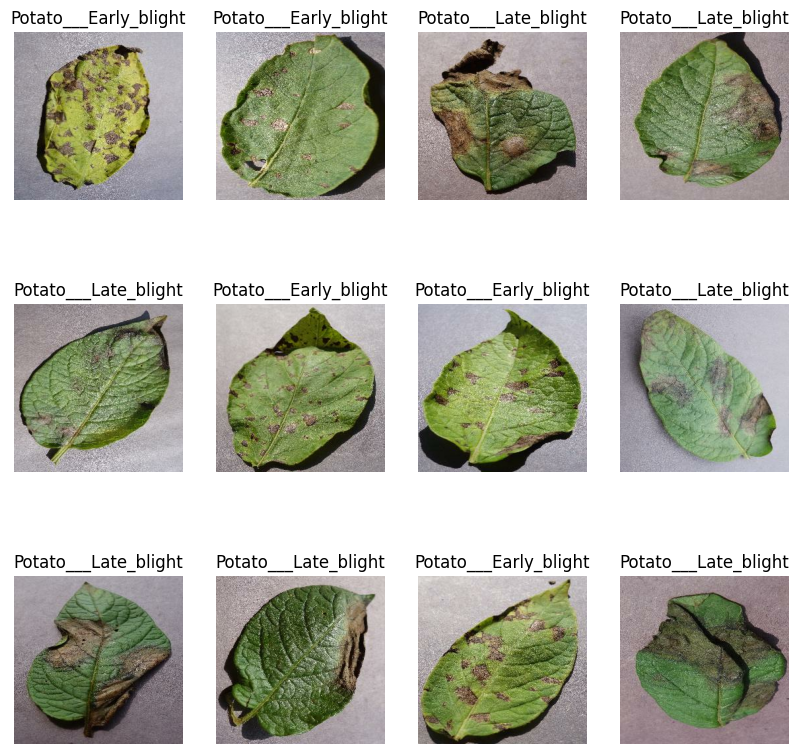

In [24]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [26]:
# 80% ==> training
# 20% ==> 10% validation , 10% test

In [27]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [29]:
train_ds = dataset.take(54)   #(:54)
len(train_ds)

54

In [30]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [31]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [32]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [33]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [37]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1 , test_split = 0.1 ,shuffle = True ,shuffle_size = 10000) :
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds =ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds


In [38]:
train_ds, val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [39]:
len(train_ds)

54

In [40]:
#train start

In [ ]:
train_ds.cache().shuffle(1000).prefetc h( )